# Observações e Conclusões

# 1. Resultados e observações de cada método de escalonamento

 # 1.1. Escalonamento Aleatório

In [42]:
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def show_wait_times(wait_file):
    times = np.loadtxt(wait_file)
    work = times[:, 0]
    arrival = times[:, 1]
    departure = times[:, 2]
    wait_time = departure - arrival - work
    plt.hist(wait_time)
    plt.title('Client wait times')
    plt.show()
    
    # Compute mean wait time
    s = 0
    for w in wait_time:
        s += w
    print(f'The mean wait time for {len(wait_time)} tasks was {s/len(wait_time)}')
    
    # Compute median wait time
    print(f'The median wait time for {len(wait_time)} tasks was {st.median(wait_time)}')
    
    # Compute maximum wait time
    print(f'The maximum wait time for {len(wait_time)} tasks was {max(wait_time)}')

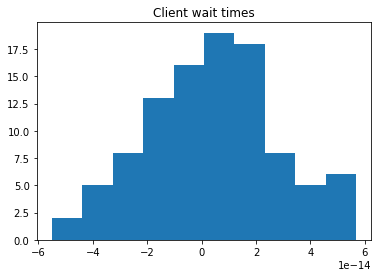

The mean wait time for 100 tasks was 4.4558801093330656e-15
The median wait time for 100 tasks was 3.552713678800501e-15
The maximum wait time for 100 tasks was 5.684341886080802e-14


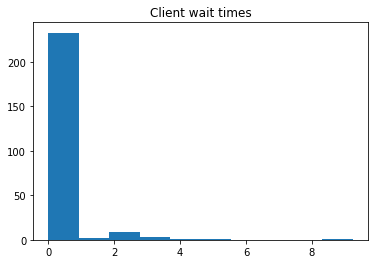

The mean wait time for 250 tasks was 0.21564186284235187
The median wait time for 250 tasks was 0.0
The maximum wait time for 250 tasks was 9.242014744076512


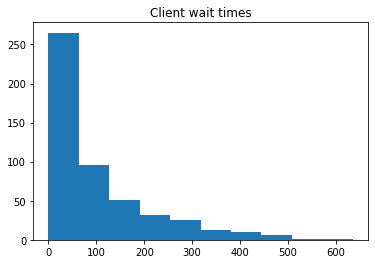

The mean wait time for 500 tasks was 97.49217772946282
The median wait time for 500 tasks was 50.995076961255485
The maximum wait time for 500 tasks was 635.4085361017991


In [46]:
show_wait_times('random_100tasks_wait.dat')
show_wait_times('random_250tasks_wait.dat')
show_wait_times('random_500tasks_wait.dat')

Primeiramente, é importante notar que o tempo de espera é basicamente sempre zero (com diferenças apenas devido à limitação computacional de cálculos com números irracionais) nos casos com apenas 100 tarefas submetidas, já que, nesses casos, o intervalo de chegada das tarefas é muito próximo da média da quantidade de trabalho exigido por cada tarefa (10) e há 4 atendentes, fazendo com que quase todas as tarefas comecem a ser resolvidas assim que chegarem. Isso acontece para os outros escalonamentos a seguir.

Adicionalmente, como é de se esperar para uma distribuição aleatória, a quantidade de tarefas que esperaram um certo tempo decai com a quantidade de tempo, tendo, com 500 tarefas, várias (a maioria) tarefas que esperaram até 50 unidades de tempo (mediana) e poucas que esperaram mais de 100. Porém a média e o maior tempo de espera são bem elevados.

 # 1.2. Escalonamento first-in first-out

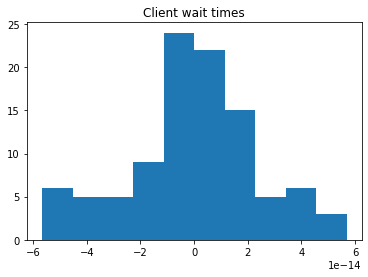

The mean wait time for 100 tasks was 1.3877787807814457e-17
The median wait time for 100 tasks was 4.440892098500626e-16
The maximum wait time for 100 tasks was 5.684341886080802e-14


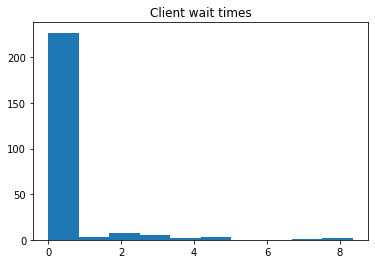

The mean wait time for 250 tasks was 0.3084022640773076
The median wait time for 250 tasks was 0.0
The maximum wait time for 250 tasks was 8.356507178029608


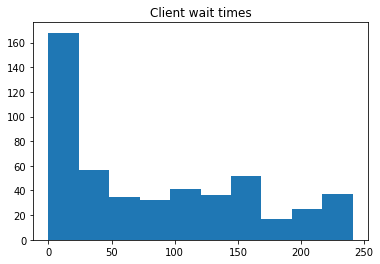

The mean wait time for 500 tasks was 86.94888509727615
The median wait time for 500 tasks was 58.6607289726
The maximum wait time for 500 tasks was 240.96669177903573


In [47]:
show_wait_times('first_in_first_out_100tasks_wait.dat')
show_wait_times('first_in_first_out_250tasks_wait.dat')
show_wait_times('first_in_first_out_500tasks_wait.dat')

Aqui não percebe-se uma diferença expressiva na média do tempo de espera e na sua mediana em relação ao escalonamento aleatório, mas é evidente uma queda no maior tempo de espera em virtude da prioridade em relação aos que chegaram primeiro, fazendo com que não tenham que esperar tanto assim. Em geral, isso não acontece no escalonamento aleatório, em que é praticamente inevitável que certas tarefas demorem a ser escolhidas por aleatoriedade.

# 1.3. Escalonamento last-in first-out

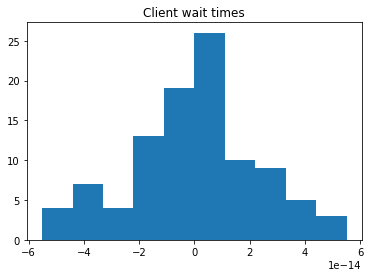

The mean wait time for 100 tasks was -5.036249195455866e-16
The median wait time for 100 tasks was 0.0
The maximum wait time for 100 tasks was 5.5067062021407764e-14


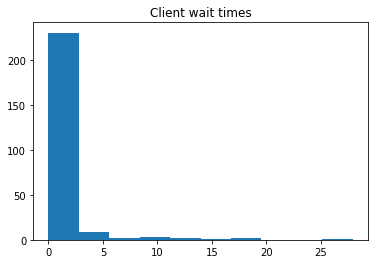

The mean wait time for 250 tasks was 0.8236391331997922
The median wait time for 250 tasks was 7.105427357601002e-15
The maximum wait time for 250 tasks was 27.91952889751393


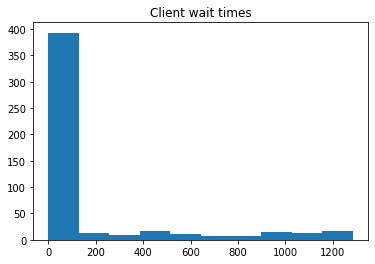

The mean wait time for 500 tasks was 158.53478939914024
The median wait time for 500 tasks was 1.6649609506858394
The maximum wait time for 500 tasks was 1284.0374074301342


In [49]:
show_wait_times('last_in_first_out_100tasks_wait.dat')
show_wait_times('last_in_first_out_250tasks_wait.dat')
show_wait_times('last_in_first_out_500tasks_wait.dat')

Neste método de escalonamento, nota-se um considerável aumento na média dos tempos de espera e no máximo tempo de espera também, tendo em vista que, conforme as tarefas que vão chegando ganham prioridade na frente das que já estavam esperando, tarefas antigas vão se acumulando e esperando por longos intervalos de tempo, como nesse caso em que algumas tarefas demoraram mais do que o tempo T = 1000.

Por outro lado, a mediana ficou sempre em torno de 0, mostrando uma distribuição mais uniforme nos tempos de espera, o que pode não ser muito útil ao levar em consideração o alto tempo de espera de várias tarefas.

# 1.4. Escalonamento por tamanho

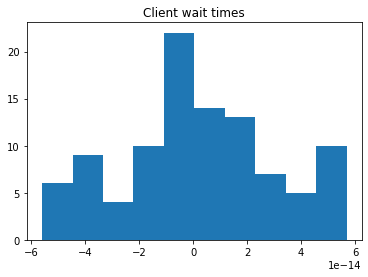

The mean wait time for 100 tasks was 2.0856927296364346e-15
The median wait time for 100 tasks was 0.0
The maximum wait time for 100 tasks was 5.684341886080802e-14


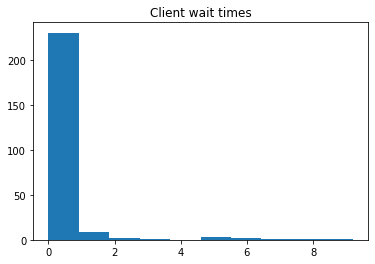

The mean wait time for 250 tasks was 0.29974376840726047
The median wait time for 250 tasks was 3.552713678800501e-15
The maximum wait time for 250 tasks was 9.201883960882677


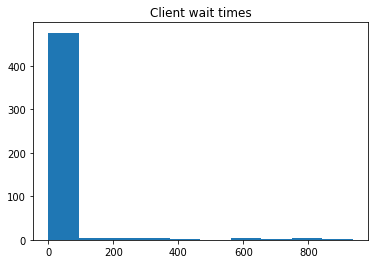

The mean wait time for 500 tasks was 27.7369030360078
The median wait time for 500 tasks was 2.7022883711215906
The maximum wait time for 500 tasks was 935.9480022828143


In [50]:
show_wait_times('less_work_first_100tasks_wait.dat')
show_wait_times('less_work_first_250tasks_wait.dat')
show_wait_times('less_work_first_500tasks_wait.dat')

Por fim, fica evidente a maior efetividade do escalonamento que prioriza as tarefas mais curtas para obter-se uma menor média de tempo de espera, bem como uma baixa mediana. Ademais, apesar do alto tempo de espera de algumas tarefas (as mais demoradas tendendo a esperar mais), pouquíssimas tarefas esperam mais do que 50 unidades de tempo.

# 2. Conclusões

# 2.1. Para quantidades baixas de tarefas (N=100)

A diferença dos escalonamentos se mostrou irrelevante para os casos com apenas 100 tarefas e levando em consideração a taxa de resolução dos atendentes (1) e a o intervalo de tempo entre as chegadas das tarefas, que coincide quase com a média da quantidade de trabalho de cada tarefa, deixando os atendentes quase sempre livres para atender as tarefas assim que forem submetidas.

# 2.2. Para quantidades intermediárias de tarefas (N=250)

Ainda não se percebe grandes diferenças para quantidades intermediárias de tarefas, com exceção do escalonamento last-in-first-out, que se destaca com a maior média e o maior máximo de tempo de espera em relação a todos os outros.

Portanto, para obter-se uma menor mediana (distribuição mais uniforme) é indiferente o tipo de escalonamento, mas, para menores médias e máximos, qualquer um é válido/equivalente dentre os escalonamentos aleatório, first-in-first-out e por tamanho.

# 2.3. Para quantidades altas de tarefas (N=500)

Já para grandes quantidades de tarefas a serem resolvidas, fica clara a diferença entre cada método, com o escalonamento last-in-last-out ainda sendo o com mais desvantagens, enquanto o __escalonamento por tamanho__ demonstra ser o mais vantajoso por atender uma maior quantidade de tarefas sem fazer com que tantas outras esperem muito, mantendo a menor média de tempo de espera dentre todos os métodos, mas com o segundo maior máximo.

Em contraste, caso seja desejada uma distribuição mais uniforme que não faz nenhum cliente esperar tanto (menos que T/4) e com uma média de tempo de espera não tão alta (menos que 20% de N), o mais adequado seria o __escalonamento first-in-first-out__, que, por sinal, é o mais tradicional.